In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#IMPORTING REQUIRED CSV TO PYTHON DATAFRAMES
customer= pd.read_csv("D:/Datasets/retail/Customer.csv")
prod_cat_info= pd.read_csv("D:/Datasets/retail/prod_cat_info.csv")
transactions= pd.read_csv("D:/Datasets/retail/Transactions.csv")

In [4]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [6]:
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [7]:
prod_cat_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [8]:
prod_trans= pd.merge(left=transactions, right=prod_cat_info,on=["prod_cat_code","prod_subcat_code"],how="left")

In [9]:
customer_final = pd.merge(left=prod_trans, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

In [10]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [11]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,27-11-1979,F,3.0


In [12]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,15-01-1982,M,1.0


In [13]:
customer_final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,271021.746497,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2431.692059,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,270980.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,273114.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


In [14]:
conti_customer = customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

In [15]:
#for col in conti_customer.columns:
 #   conti_customer

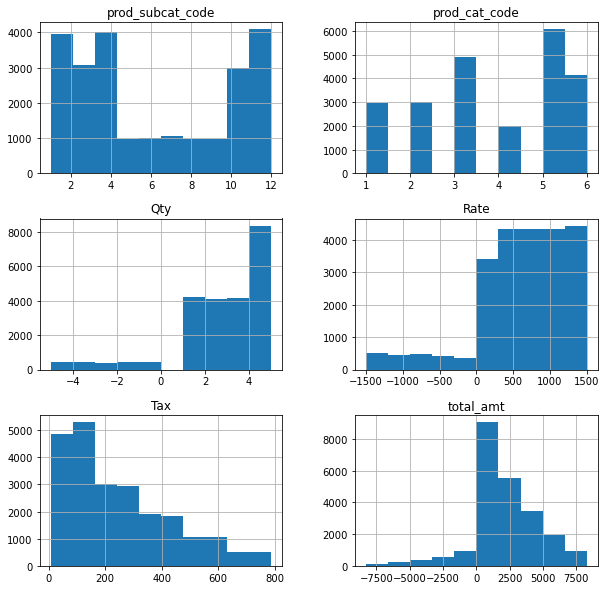

In [16]:
hist=conti_customer.hist(figsize=(10,10))

In [17]:
category_customer = customer_final.loc[:,customer_final.dtypes=='object']

In [18]:
category_customer.columns

Index(['tran_date', 'Store_type', 'prod_cat', 'prod_subcat', 'DOB', 'Gender'], dtype='object')

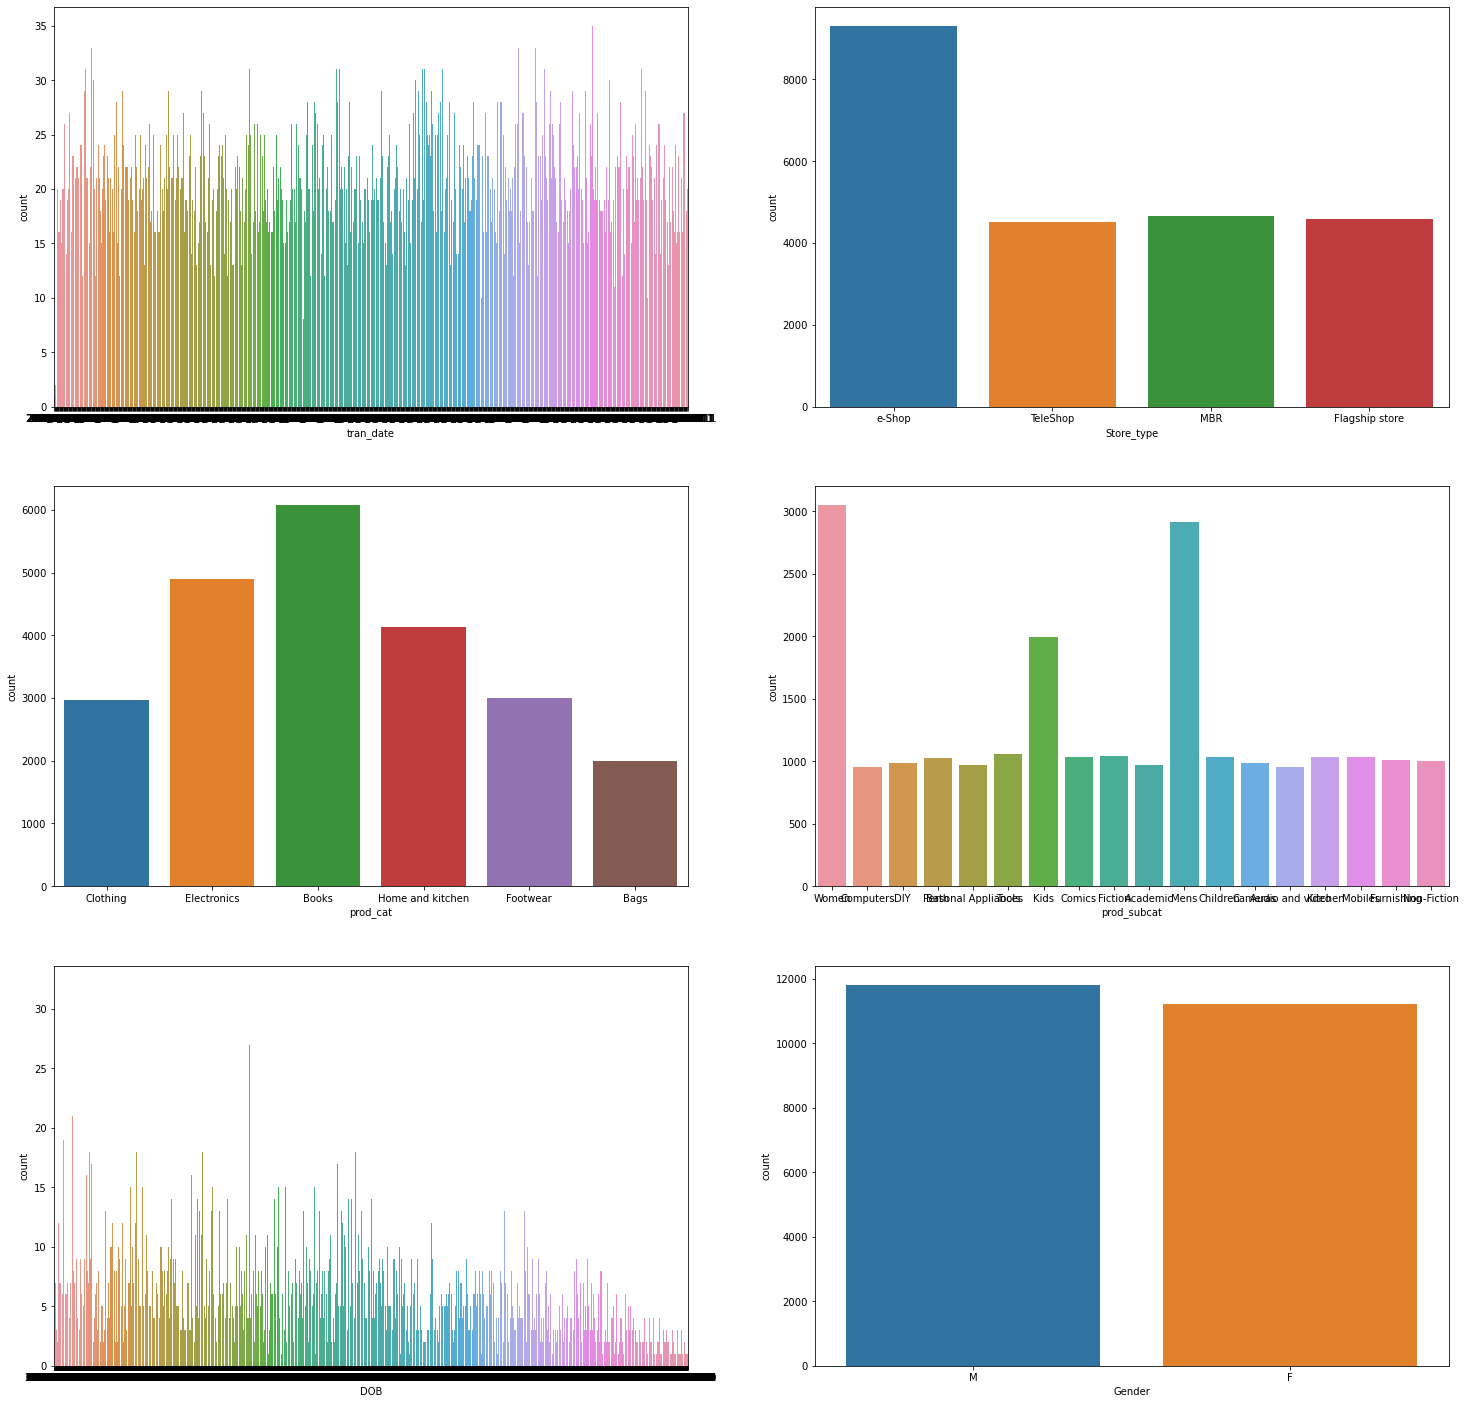

In [30]:
plt.figure(figsize=(25,25))
for val,col in enumerate(category_customer.columns):
    plt.subplot(3,2,val+1)
    sns.countplot(x=category_customer[col])

plt.show()

In [108]:
import datetime
min_date = customer_final["tran_date"].min()
print(min_date)

1/1/2012


In [109]:
max_date = customer_final["tran_date"].max()

In [110]:
min_date=datetime.datetime(int(min_date[-4:]),int(min_date[0]),int(min_date[2]))
max_date=datetime.datetime(int(max_date[-4:]),int(max_date[0]),int(max_date[2]))

In [113]:
print("Time period of the available transaction data is from "+ min_date.strftime(format="%d-%m-%Y") 
      + " to " +max_date.strftime(format="%d-%m-%Y"))

Time period of the available transaction data is from 01-01-2012 to 09-09-2013


In [114]:
negative_transaction = customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()

In [115]:
print("Count of transactions where the total amount of transaction was negative is",negative_transaction)

Count of transactions where the total amount of transaction was negative is 2177


In [116]:
product_by_gender = customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()

In [117]:
product_by_gender

,Gender,prod_cat,Qty
0,F,Bags,2362
1,F,Books,7070
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3716
5,F,Home and kitchen,4895
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6476


In [118]:
print("Products that are popular among males are: Books,Clothing,Electronics,Home and kitchen")
print("Products that are popular among females are: Bags,Footwear")

Products that are popular among males are: Books,Clothing,Electronics,Home and kitchen
Products that are popular among females are: Bags,Footwear


In [119]:
customer_group = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)

In [120]:
customer_group

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: customer_Id, dtype: int64

In [121]:
percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)

In [122]:
percentage

10.51

In [123]:
print("City code 4.0 has the maximum customers and the percentage of customers from that city is ",percentage)


City code 4.0 has the maximum customers and the percentage of customers from that city is  10.51


In [129]:
customer_final.groupby("Store_type")[["Qty","Rate"]].sum().sort_values(by="Qty",ascending=False)

,Qty,Rate
Store_type,,
e-Shop,22763,5941001
MBR,11194,2953253
Flagship store,11133,2941557
TeleShop,10984,2834420


In [130]:
print('e-Shop store sell the maximum products by value and by quantity')

e-Shop store sell the maximum products by value and by quantity


In [131]:
store_group = round(customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)

In [132]:
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.83,848678.68,789181.06,1616300.08
Books,2488205.85,2496039.20,2545005.06,5293443.93
Clothing,1194423.23,1287686.34,1241834.36,2527193.57
Electronics,2215136.04,2107514.56,1973338.83,4426474.20
Footwear,1234806.56,1112163.72,1235719.29,2637084.71
Home and kitchen,1712567.68,1822403.57,1579702.47,3324319.57


In [133]:
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

In [134]:
gender_group = round(customer_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)

In [135]:
gender_group

Gender,F,M
prod_cat,,
Bags,2077985.65,2046722.99
Books,6164692.23,6645972.77
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5703109.43
Footwear,3202552.99,3014672.05
Home and kitchen,4132177.33,4301075.48


In [136]:
male_earning = gender_group.loc["Electronics","M"]

In [137]:
print("The total amount earned from Male customers under the Electronics category is",male_earning)

The total amount earned from Male customers under the Electronics category is 5703109.43


In [138]:
positive_trans = customer_final.loc[customer_final["total_amt"]>0,:]

In [139]:
unique_trans = positive_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [140]:
unique_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [141]:
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()

In [142]:
unique_trans_count.head()

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8


In [143]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

,customer_Id,transaction_id


In [144]:
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


In [150]:
now = pd.Timestamp('now')
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format="%d-%m-%Y")    # 1
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
customer_final['AGE'] = (now - customer_final['DOB']).astype('<m8[Y]')

In [151]:
customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [152]:
age_product = customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

In [153]:
age_product

Age_cat  prod_cat        
25-35    Bags                1221960.935
         Books               3735634.825
         Clothing            2102806.160
         Electronics         3359072.925
         Footwear            1990035.385
         Home and kitchen    2622752.860
36-46    Bags                1923075.700
         Books               6383030.290
         Clothing            2953220.790
         Electronics         5024093.555
         Footwear            2885838.995
         Home and kitchen    4140973.135
47-57    Bags                 979672.005
         Books               2704028.925
         Clothing            1195110.540
         Electronics         2339297.155
         Footwear            1343899.895
         Home and kitchen    1675267.295
Name: total_amt, dtype: float64

In [154]:
age_product.loc['25-35',['Books','Electronics']]

Age_cat  prod_cat   
25-35    Books          3735634.825
         Electronics    3359072.925
Name: total_amt, dtype: float64

In [155]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      age_product.loc['25-35',['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 7094707.75


In [156]:
customer_total_amount_25_35 = customer_final[customer_final['Age_cat']=='25-35']


In [157]:
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') &
                                           (customer_total_amount_25_35['tran_date'] <='2014-03-01')]

In [158]:
total_amount

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat


In [159]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum().round(2))

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 0.0
